In [1]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 30
    batch_size = 32
    
    test_size = 0.3 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr = 0.001 #slowed learningrate # 0.1 after 20 epoch full

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

calculating on: cuda:0
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2448, -0.2370,  0.0793,  ..., -0.3024, -0.3016, -0.3026],
        [-0.2335, -0.2097,  0.2610,  ..., -0.3246, -0.3225, -0.3246],
        [-0.2355, -0.1391,  0.3265,  ..., -0.3400, -0.3376, -0.3397]])
train:shuffel = True
eval:shuffel = True
Epoch: 0
      Training_acc: 0.6256281407035176
-------------------

Epoch: 1
      Training_acc: 0.6256281407035176
-------------------

Epoch: 2
      Training_acc: 0.6256281407035176
-------------------

Epoch: 3
      Training_acc: 0.6256281407035176
-------------------

Epoch: 4
      Training_acc: 0.6331658291457286
-------------------

Epoch: 5
      Training_acc: 0.7160804020100503
-------------------

Epoch: 6
      Training_acc: 0.8241206030150754
-------------------

Ep

13it [00:06,  2.06it/s]

Progess: 3.08%
test acc: 63.16%
test Loss: 0.68
-------------------


26it [00:12,  2.04it/s]

Progess: 6.41%
test acc: 63.16%
test Loss: 0.68
-------------------


39it [00:18,  2.05it/s]

Progess: 9.74%
test acc: 63.16%
test Loss: 0.68
-------------------


52it [00:25,  2.06it/s]

Progess: 13.08%
test acc: 63.16%
test Loss: 0.67
-------------------


65it [00:32,  2.04it/s]

Progess: 16.41%
test acc: 63.70%
test Loss: 0.67
-------------------


78it [00:38,  2.05it/s]

Progess: 19.74%
test acc: 70.72%
test Loss: 0.66
-------------------


91it [00:44,  2.06it/s]

Progess: 23.08%
test acc: 80.61%
test Loss: 0.66
-------------------


104it [00:51,  2.05it/s]

Progess: 26.41%
test acc: 85.56%
test Loss: 0.65
-------------------


117it [00:57,  2.05it/s]

Progess: 29.74%
test acc: 87.85%
test Loss: 0.64
-------------------


130it [01:03,  2.07it/s]

Progess: 33.08%
test acc: 89.92%
test Loss: 0.63
-------------------


143it [01:09,  2.07it/s]

Progess: 36.41%
test acc: 91.36%
test Loss: 0.62
-------------------


156it [01:16,  2.06it/s]

Progess: 39.74%
test acc: 92.26%
test Loss: 0.61
-------------------


169it [01:22,  2.05it/s]

Progess: 43.08%
test acc: 92.44%
test Loss: 0.60
-------------------


182it [01:28,  2.06it/s]

Progess: 46.41%
test acc: 92.71%
test Loss: 0.59
-------------------


195it [01:35,  2.03it/s]

Progess: 49.74%
test acc: 92.76%
test Loss: 0.58
-------------------


208it [01:41,  2.07it/s]

Progess: 53.08%
test acc: 92.80%
test Loss: 0.57
-------------------


221it [01:48,  2.04it/s]

Progess: 56.41%
test acc: 92.80%
test Loss: 0.56
-------------------


234it [01:54,  2.04it/s]

Progess: 59.74%
test acc: 92.80%
test Loss: 0.55
-------------------


247it [02:00,  2.05it/s]

Progess: 63.08%
test acc: 92.67%
test Loss: 0.54
-------------------


260it [02:07,  2.04it/s]

Progess: 66.41%
test acc: 92.67%
test Loss: 0.54
-------------------


273it [02:13,  2.05it/s]

Progess: 69.74%
test acc: 92.53%
test Loss: 0.53
-------------------


286it [02:19,  2.04it/s]

Progess: 73.08%
test acc: 92.44%
test Loss: 0.52
-------------------


299it [02:26,  1.97it/s]

Progess: 76.41%
test acc: 92.49%
test Loss: 0.52
-------------------


312it [02:33,  2.04it/s]

Progess: 79.74%
test acc: 92.49%
test Loss: 0.51
-------------------


325it [02:39,  2.04it/s]

Progess: 83.08%
test acc: 92.58%
test Loss: 0.50
-------------------


338it [02:45,  2.04it/s]

Progess: 86.41%
test acc: 92.62%
test Loss: 0.50
-------------------


351it [02:52,  2.02it/s]

Progess: 89.74%
test acc: 92.76%
test Loss: 0.49
-------------------


364it [02:58,  2.02it/s]

Progess: 93.08%
test acc: 92.67%
test Loss: 0.49
-------------------


377it [03:05,  1.86it/s]

Progess: 96.41%
test acc: 92.67%
test Loss: 0.48
-------------------


390it [03:12,  2.03it/s]

Progess: 99.74%
test acc: 92.67%
test Loss: 0.48
-------------------
./Models


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plotting trainingResults...
percentageWeightsSignDifference3
weightsMagnitude3
L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters
[0.120703176, 0.1241924, 0.11451975, 0.098910615, 0.0916322, 0.07652568, 0.113006674, 0.099801555, 0.11318195, 0.116751894, 0.13945495, 0.10194071, 0.07979034, 0.09062602, 0.08365142, 0.07799873, 0.10130148, 0.10286586, 0.08161047, 0.106632724, 0.099981286, 0.08629801, 0.108752705, 0.11000655, 0.07757874, 0.0706488, 0.09510706, 0.08288029, 0.08213467, 0.113638476, 0.11120544, 0.08554656, 0.10858347, 0.10568146, 0.092260145, 0.11217537, 0.11551185, 0.083258964, 0.07373588, 0.095044814, 0.08372569, 0.08247454, 0.11136986, 0.10891861, 0.08360379, 0.1094543, 0.10660503, 0.095017016, 0.116611816, 0.119970284, 0.08315733, 0.076239154, 0.1007908

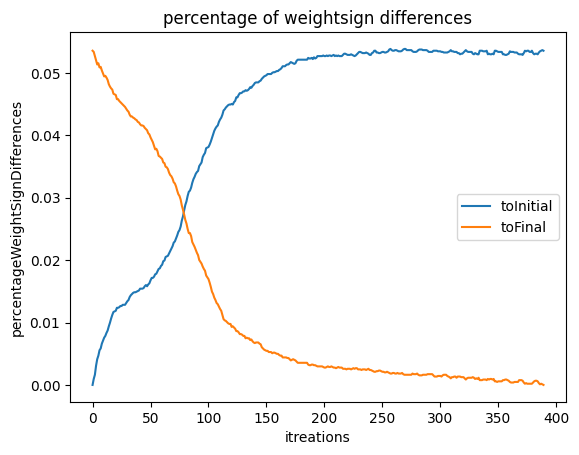

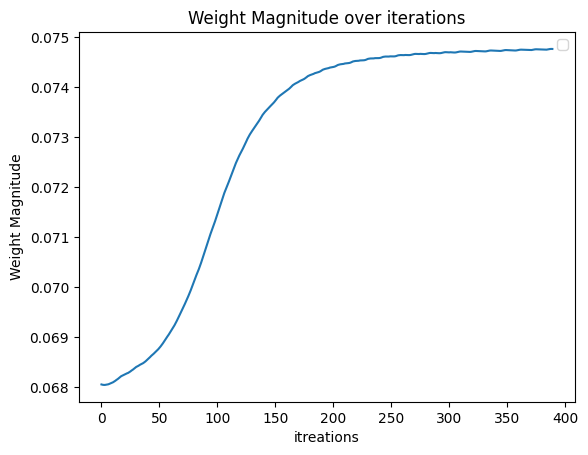

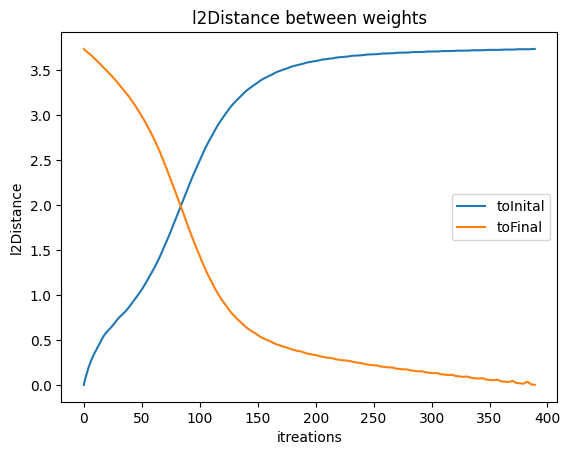

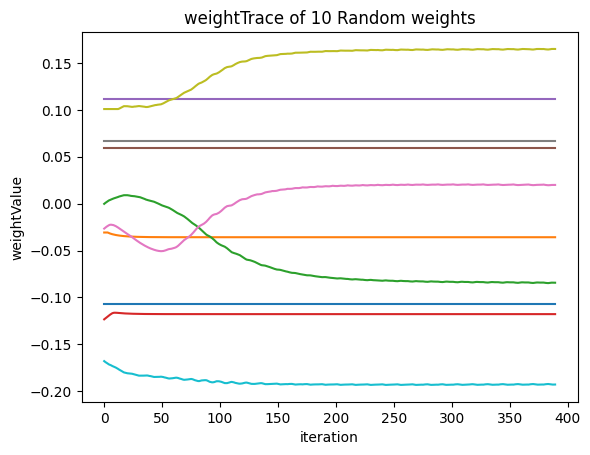

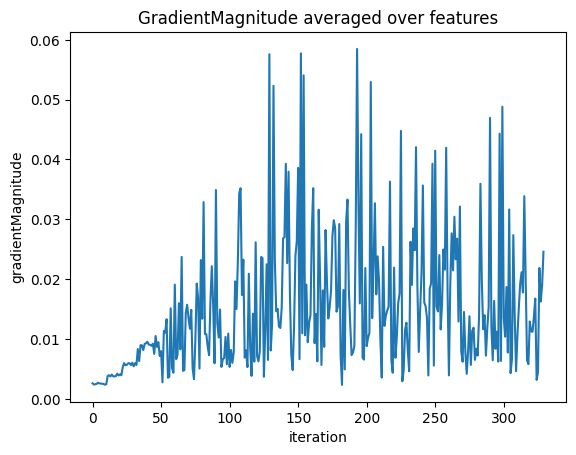

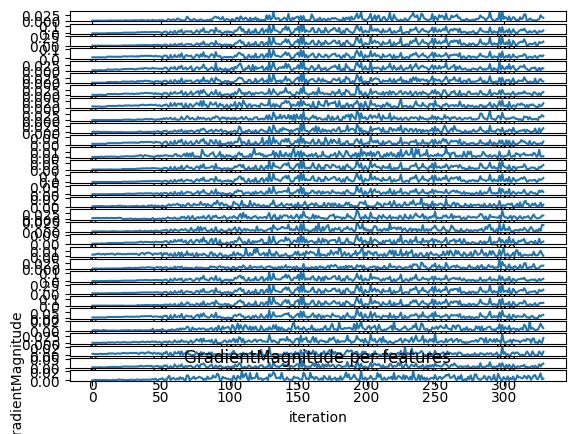

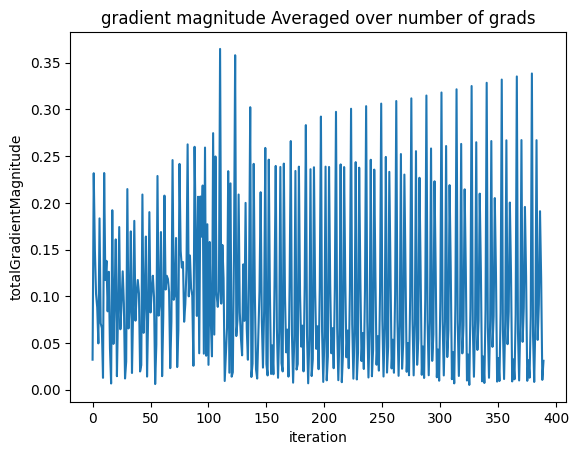

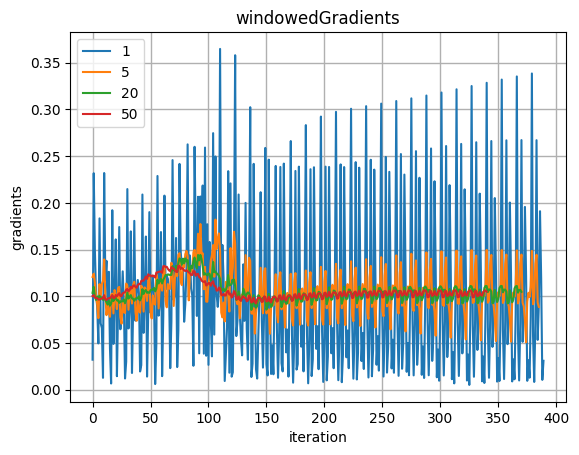

In [2]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [3]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





numerical


  0%|          | 0/390 [00:00<?, ?it/s]

--------------
1.0
0.07355371900826448
--------------


  0%|          | 1/390 [00:00<04:33,  1.42it/s]

14
55
--------------
1.0
0.10408432147562584
--------------


  1%|          | 2/390 [00:01<03:59,  1.62it/s]

24
69
--------------
1.0
0.11533242876526459
--------------


  1%|          | 3/390 [00:01<03:47,  1.70it/s]

26
67
--------------
1.0
0.11776859504132231
--------------


  1%|          | 4/390 [00:02<04:13,  1.52it/s]

26
66
--------------
1.0
0.11570247933884295
--------------


  1%|▏         | 5/390 [00:03<04:09,  1.54it/s]

28
66
--------------
1.0
0.10828877005347592
--------------


  2%|▏         | 6/390 [00:03<04:02,  1.59it/s]

31
68
--------------
1.0
0.11941448382126348
--------------


  2%|▏         | 7/390 [00:04<04:06,  1.55it/s]

28
59
--------------
1.0
0.11528326745718052
--------------


  2%|▏         | 8/390 [00:05<04:04,  1.56it/s]

37
69
--------------
1.0
0.11296791443850267
--------------


  2%|▏         | 9/390 [00:05<03:59,  1.59it/s]

37
68
--------------
1.0
0.11305361305361299
--------------


  3%|▎         | 10/390 [00:06<04:30,  1.40it/s]

45
78
--------------
1.0
0.11855036855036852
--------------


  3%|▎         | 11/390 [00:07<04:21,  1.45it/s]

42
74
--------------
1.0
0.11534090909090908
--------------


  3%|▎         | 12/390 [00:08<04:35,  1.37it/s]

48
80
--------------
1.0
0.12305986696230595
--------------


  3%|▎         | 13/390 [00:09<04:58,  1.26it/s]

50
82
--------------
1.0
0.12329545454545454
--------------


  4%|▎         | 14/390 [00:09<04:52,  1.28it/s]

51
80
--------------
1.0
0.11919191919191917
--------------


  4%|▍         | 15/390 [00:10<05:28,  1.14it/s]

59
90
--------------
1.0
0.12005928853754934
--------------


  4%|▍         | 16/390 [00:11<05:38,  1.11it/s]

60
92
--------------
1.0
0.12170087976539584
--------------


  4%|▍         | 17/390 [00:12<05:49,  1.07it/s]

62
93
--------------
1.0
0.11992263056092836
--------------


  5%|▍         | 18/390 [00:13<05:53,  1.05it/s]

62
94
--------------
1.0
0.12023460410557181
--------------


  5%|▍         | 19/390 [00:14<05:54,  1.05it/s]

62
93
--------------
1.0
0.12450592885375489
--------------


  5%|▌         | 20/390 [00:15<05:55,  1.04it/s]

62
92
--------------
1.0
0.12026515151515148
--------------


  5%|▌         | 21/390 [00:16<06:03,  1.01it/s]

66
96
--------------
1.0
0.12026515151515149
--------------


  6%|▌         | 22/390 [00:18<06:28,  1.06s/it]

66
96
--------------
1.0
0.12676767676767675
--------------


  6%|▌         | 23/390 [00:19<06:27,  1.06s/it]

60
90
--------------
1.0
0.12387612387612383
--------------


  6%|▌         | 24/390 [00:20<06:29,  1.06s/it]

64
91
--------------
1.0
0.12330754352030943
--------------


  6%|▋         | 25/390 [00:21<06:27,  1.06s/it]

64
94
--------------
1.0
0.1226783968719452
--------------


  7%|▋         | 26/390 [00:22<06:28,  1.07s/it]

64
93
--------------
1.0
0.12324273664479847
--------------


  7%|▋         | 27/390 [00:23<06:36,  1.09s/it]

69
97
--------------
1.0
0.12181818181818177
--------------


  7%|▋         | 28/390 [00:24<07:01,  1.17s/it]

71
100
--------------
1.0
0.12755102040816324
--------------


  7%|▋         | 29/390 [00:26<07:12,  1.20s/it]

68
98
--------------
1.0
0.12590909090909086
--------------


  8%|▊         | 30/390 [00:27<07:05,  1.18s/it]

69
100
--------------
1.0
0.12681818181818177
--------------


  8%|▊         | 31/390 [00:28<07:29,  1.25s/it]

71
100
--------------
1.0
0.12621359223300965
--------------


  8%|▊         | 32/390 [00:29<07:33,  1.27s/it]

74
103
--------------
1.0
0.1255625562556255
--------------


  8%|▊         | 33/390 [00:31<07:36,  1.28s/it]

71
101
--------------
1.0
0.126991565135895
--------------


  9%|▊         | 34/390 [00:32<07:39,  1.29s/it]

68
97
--------------
1.0
0.12590909090909086
--------------


  9%|▉         | 35/390 [00:33<07:28,  1.26s/it]

72
100
--------------
1.0
0.12590909090909086
--------------


  9%|▉         | 36/390 [00:35<07:36,  1.29s/it]

71
100
--------------
1.0
0.12626262626262624
--------------


  9%|▉         | 37/390 [00:36<07:22,  1.25s/it]

69
99
--------------
1.0
0.12855831037649218
--------------


 10%|▉         | 38/390 [00:37<07:27,  1.27s/it]

70
99
--------------
1.0
0.12993572084481173
--------------


 10%|█         | 39/390 [00:38<07:17,  1.25s/it]

70
99
--------------
1.0
0.13223140495867766
--------------


 10%|█         | 40/390 [00:40<07:26,  1.27s/it]

72
99
--------------
1.0
0.12809917355371897
--------------


 11%|█         | 41/390 [00:41<07:49,  1.34s/it]

73
99
--------------
1.0
0.1256684491978609
--------------


 11%|█         | 42/390 [00:43<08:06,  1.40s/it]

75
102
--------------
1.0
0.13101604278074863
--------------


 11%|█         | 43/390 [00:44<08:20,  1.44s/it]

74
102
--------------
1.0
0.12930273609885257
--------------


 11%|█▏        | 44/390 [00:46<08:31,  1.48s/it]

76
103
--------------
1.0
0.12753751103265662
--------------


 12%|█▏        | 45/390 [00:47<08:11,  1.43s/it]

75
103
--------------
1.0
0.12834224598930477
--------------


 12%|█▏        | 46/390 [00:48<08:11,  1.43s/it]

74
102
--------------
0.9962585034013606
0.12640692640692638
--------------


 12%|█▏        | 47/390 [00:50<08:11,  1.43s/it]

76
105
--------------
0.9956310679611651
0.12488967343336271
--------------


 12%|█▏        | 48/390 [00:51<08:11,  1.44s/it]

74
103
--------------
1.0
0.12745098039215683
--------------


 13%|█▎        | 49/390 [00:53<08:08,  1.43s/it]

72
102
--------------
0.998019801980198
0.13051305130513047
--------------


 13%|█▎        | 50/390 [00:54<07:48,  1.38s/it]

69
101
--------------
0.9944444444444445
0.12683982683982684
--------------


 13%|█▎        | 51/390 [00:55<07:53,  1.40s/it]

70
105
--------------
0.9955445544554455
0.13186318631863184
--------------


 13%|█▎        | 52/390 [00:57<07:38,  1.36s/it]

71
101
--------------
1.0
0.13279857397504452
--------------


 14%|█▎        | 53/390 [00:58<07:47,  1.39s/it]

73
102
--------------
0.9956730769230769
0.1284965034965035
--------------


 14%|█▍        | 54/390 [01:00<07:52,  1.41s/it]

72
104
--------------
0.9976190476190476
0.12900432900432898
--------------


 14%|█▍        | 55/390 [01:01<08:07,  1.45s/it]

76
105
--------------
0.9976190476190476
0.12987012987012986
--------------


 14%|█▍        | 56/390 [01:03<08:15,  1.48s/it]

75
105
--------------
1.0
0.12778730703259003
--------------


 15%|█▍        | 57/390 [01:04<08:24,  1.52s/it]

77
106
--------------
1.0
0.13121783876500856
--------------


 15%|█▍        | 58/390 [01:06<08:09,  1.48s/it]

75
106
--------------
0.9934579439252336
0.12701784197111296
--------------


 15%|█▌        | 59/390 [01:07<08:14,  1.49s/it]

76
107
--------------
0.9961059190031154
0.12659303313508918
--------------


 15%|█▌        | 60/390 [01:09<08:30,  1.55s/it]

77
107
--------------
1.0
0.13155594405594404
--------------


 16%|█▌        | 61/390 [01:10<08:04,  1.47s/it]

71
104
--------------
0.9943939393939393
0.12066115702479333
--------------


 16%|█▌        | 62/390 [01:12<08:02,  1.47s/it]

74
110
--------------
0.9983660130718955
0.12923351158645272
--------------


 16%|█▌        | 63/390 [01:13<07:56,  1.46s/it]

69
102
--------------
0.9986263736263736
0.12674825174825172
--------------


 16%|█▋        | 64/390 [01:14<07:36,  1.40s/it]

71
104
--------------
0.9912031184155078
0.11906677393403055
--------------


 17%|█▋        | 65/390 [01:16<07:49,  1.45s/it]

79
113
--------------
0.9930555555555557
0.12320574162679424
--------------


 17%|█▋        | 66/390 [01:18<08:02,  1.49s/it]

79
114
--------------
0.9937389770723105
0.1258417508417508
--------------


 17%|█▋        | 67/390 [01:19<08:12,  1.53s/it]

76
108
--------------
1.0
0.12552126772310254
--------------


 17%|█▋        | 68/390 [01:21<08:16,  1.54s/it]

75
109
--------------
0.9931657848324514
0.12668350168350165
--------------


 18%|█▊        | 69/390 [01:22<07:59,  1.49s/it]

75
108
--------------
0.9936635944700462
0.11876832844574776
--------------


 18%|█▊        | 70/390 [01:24<08:08,  1.53s/it]

91
124
--------------
0.9903404344193819
0.1180223285486443
--------------


 18%|█▊        | 71/390 [01:26<08:34,  1.61s/it]

84
114
--------------
0.9928971588635453
0.11306340718105419
--------------


 18%|█▊        | 72/390 [01:27<08:17,  1.56s/it]

82
119
--------------
0.9783910533910533
0.09724517906336087
--------------


 19%|█▊        | 73/390 [01:29<08:49,  1.67s/it]

121
165
--------------
0.989663770913771
0.10503685503685503
--------------


 19%|█▉        | 74/390 [01:31<09:16,  1.76s/it]

109
148
--------------
0.9889212827988337
0.10946196660482374
--------------


 19%|█▉        | 75/390 [01:33<09:37,  1.83s/it]

102
147
--------------
0.9775534241965338
0.09187279151943464
--------------


 19%|█▉        | 76/390 [01:35<10:49,  2.07s/it]

199
283
--------------
0.9883109040717736
0.11001317523056652
--------------


 20%|█▉        | 77/390 [01:37<10:13,  1.96s/it]

101
138
--------------
0.9808339910549856
0.10070316423907584
--------------


 20%|██        | 78/390 [01:39<10:08,  1.95s/it]

123
181
--------------
0.9893363728470111
0.10541586073500966
--------------


 20%|██        | 79/390 [01:41<09:39,  1.86s/it]

91
141
--------------
0.9910668143226283
0.11381254404510219
--------------


 21%|██        | 80/390 [01:42<09:21,  1.81s/it]

93
129
--------------
0.9894947291893859
0.12005551700208188
--------------


 21%|██        | 81/390 [01:44<09:04,  1.76s/it]

95
131
--------------
0.9837301587301587
0.10164141414141414
--------------


 21%|██        | 82/390 [01:46<09:39,  1.88s/it]

99
144
--------------
0.9764150270886797
0.07920522591181274
--------------


 21%|██▏       | 83/390 [01:49<11:11,  2.19s/it]

280
334
--------------
0.9851113172541743
0.11157024793388429
--------------


 22%|██▏       | 84/390 [01:51<10:33,  2.07s/it]

113
154
--------------
0.9837606837606838
0.0928030303030303
--------------


 22%|██▏       | 85/390 [01:54<11:14,  2.21s/it]

266
312
--------------
0.9817365835222979
0.08694083694083692
--------------


 22%|██▏       | 86/390 [01:56<11:05,  2.19s/it]

167
252
--------------
0.9902691511387163
0.10968379446640317
--------------


 22%|██▏       | 87/390 [01:57<10:21,  2.05s/it]

95
138
--------------
0.9817689255189256
0.0724067599067599
--------------


 23%|██▎       | 88/390 [02:00<10:34,  2.10s/it]

222
312
--------------
0.9845133667502088
0.09150717703349281
--------------


 23%|██▎       | 89/390 [02:02<10:42,  2.14s/it]

133
228
--------------
0.9900806208559374
0.07508630609896433
--------------


 23%|██▎       | 90/390 [02:04<11:24,  2.28s/it]

242
316
--------------
0.9874592302674494
0.08042756330427561
--------------


 23%|██▎       | 91/390 [02:07<12:19,  2.47s/it]

338
438
--------------
0.9849339066730372
0.07889936150805715
--------------


 24%|██▎       | 92/390 [02:10<12:10,  2.45s/it]

203
299
--------------
0.9821158884265682
0.0744336569579288
--------------


 24%|██▍       | 93/390 [02:13<12:44,  2.58s/it]

213
309
--------------
0.9798063623789764
0.0839305922293474
--------------


 24%|██▍       | 94/390 [02:15<11:58,  2.43s/it]

182
241
--------------
0.9864715935879302
0.07380738073807379
--------------


 24%|██▍       | 95/390 [02:18<12:44,  2.59s/it]

275
404
--------------
0.9872938064114534
0.08318478906714201
--------------


 25%|██▍       | 96/390 [02:20<12:37,  2.58s/it]

249
306
--------------
0.9858026413690476
0.08842329545454541
--------------


 25%|██▍       | 97/390 [02:22<12:00,  2.46s/it]

161
256
--------------
0.9749950396825398
0.07746212121212119
--------------


 25%|██▌       | 98/390 [02:25<11:35,  2.38s/it]

168
240
--------------
0.9878004899709081
0.07907044723764979
--------------


 25%|██▌       | 99/390 [02:27<12:05,  2.49s/it]

255
311
--------------
0.9877419354838711
0.08387096774193548
--------------


 26%|██▌       | 100/390 [02:30<11:53,  2.46s/it]

229
310
--------------
0.9905379188712522
0.07811447811447811
--------------


 26%|██▌       | 101/390 [02:33<12:26,  2.58s/it]

296
405
--------------
0.992581254724112
0.0772005772005772
--------------


 26%|██▌       | 102/390 [02:35<12:12,  2.54s/it]

225
315
--------------
0.9824356603482818
0.07649308620182406
--------------


 26%|██▋       | 103/390 [02:38<12:02,  2.52s/it]

230
309
--------------
0.9857869865503454
0.09281748785565577
--------------


 27%|██▋       | 104/390 [02:40<11:17,  2.37s/it]

198
262
--------------
0.9864946647555343
0.07053815749467923
--------------


 27%|██▋       | 105/390 [02:42<11:11,  2.36s/it]

201
299
--------------
0.9848833265499932
0.06863506863506864
--------------


 27%|██▋       | 106/390 [02:44<11:20,  2.40s/it]

217
351
--------------
0.987895238095238
0.07466666666666667
--------------


 27%|██▋       | 107/390 [02:47<11:51,  2.51s/it]

274
375
--------------
0.9917640969431252
0.06951871657754011
--------------


 28%|██▊       | 108/390 [02:50<12:17,  2.61s/it]

290
391
--------------
0.982881967953058
0.06516587677725119
--------------


 28%|██▊       | 109/390 [02:53<12:15,  2.62s/it]

265
422
--------------
0.9820263579437892
0.08076174589936057
--------------


 28%|██▊       | 110/390 [02:55<11:54,  2.55s/it]

222
327
--------------
0.9848040848040848
0.07321466412375502
--------------


 28%|██▊       | 111/390 [02:58<12:22,  2.66s/it]

271
429
--------------
0.9873809523809524
0.09331046312178384
--------------


 29%|██▊       | 112/390 [03:00<11:24,  2.46s/it]

170
265
--------------
0.9868305679212195
0.08833376255472572
--------------


 29%|██▉       | 113/390 [03:03<11:42,  2.54s/it]

266
353
--------------
0.9848655462184874
0.06673796791443848
--------------


 29%|██▉       | 114/390 [03:05<12:00,  2.61s/it]

287
425
--------------
0.9790510204081633
0.07597402597402597
--------------


 29%|██▉       | 115/390 [03:08<11:59,  2.61s/it]

240
350
--------------
0.9778538812785387
0.08156911581569114
--------------


 30%|██▉       | 116/390 [03:10<11:26,  2.51s/it]

156
292
--------------
0.9861167962887161
0.07723365459755144
--------------


 30%|███       | 117/390 [03:13<11:15,  2.48s/it]

254
349
--------------
0.9856391768063691
0.08603383997705764
--------------


 30%|███       | 118/390 [03:15<11:16,  2.49s/it]

223
317
--------------
0.9750748299319727
0.08857142857142858
--------------


 31%|███       | 119/390 [03:18<11:11,  2.48s/it]

259
350
--------------
0.9746933122279382
0.07051120624527825
--------------


 31%|███       | 120/390 [03:20<11:32,  2.56s/it]

244
361
--------------
0.9787851037851037
0.06806526806526805
--------------


 31%|███       | 121/390 [03:23<11:49,  2.64s/it]

268
390
--------------
0.9781309842972041
0.06824274920789666
--------------


 31%|███▏      | 122/390 [03:26<11:27,  2.56s/it]

239
373
--------------
0.982656116338751
0.11350027218290692
--------------


 32%|███▏      | 123/390 [03:27<10:05,  2.27s/it]

113
167
--------------
0.9888045891931903
0.06406029203956665
--------------


 32%|███▏      | 124/390 [03:30<10:33,  2.38s/it]

238
386
--------------
0.9806382711395905
0.07363876229311585
--------------


 32%|███▏      | 125/390 [03:32<10:42,  2.43s/it]

263
379
--------------
0.9817119877441594
0.06775530099926882
--------------


 32%|███▏      | 126/390 [03:35<10:58,  2.49s/it]

247
373
--------------
0.9747645211930925
0.08404095904095903
--------------


 33%|███▎      | 127/390 [03:38<11:16,  2.57s/it]

250
364
--------------
0.9778258468335789
0.08446579194001874
--------------


 33%|███▎      | 128/390 [03:40<11:13,  2.57s/it]

240
388
--------------
0.9742119859307359
0.07179752066115701
--------------


 33%|███▎      | 129/390 [03:43<11:20,  2.61s/it]

250
352
--------------
0.9649713288456743
0.07389338410280817
--------------


 33%|███▎      | 130/390 [03:46<11:25,  2.64s/it]

215
382
--------------
0.9886702986279259
0.06124807395993837
--------------


 34%|███▎      | 131/390 [03:48<11:02,  2.56s/it]

237
354
--------------
0.9768269684111269
0.07684518451845183
--------------


 34%|███▍      | 132/390 [03:51<11:21,  2.64s/it]

246
404
--------------
0.9821270683339649
0.06486616831444417
--------------


 34%|███▍      | 133/390 [03:53<11:05,  2.59s/it]

228
377
--------------
0.9869703243616287
0.06376811594202898
--------------


 34%|███▍      | 134/390 [03:56<11:05,  2.60s/it]

208
345
--------------
0.9862282690854121
0.0769119769119769
--------------


 35%|███▍      | 135/390 [03:58<10:24,  2.45s/it]

146
315
--------------
0.9830329065588499
0.07118353344768437
--------------


 35%|███▍      | 136/390 [04:01<10:34,  2.50s/it]

240
424
--------------
0.9778138528138528
0.0732927359721618
--------------


 35%|███▌      | 137/390 [04:04<10:58,  2.60s/it]

242
418
--------------
0.9832832665776591
0.072536108751062
--------------


 35%|███▌      | 138/390 [04:07<11:18,  2.69s/it]

255
428
--------------
0.9709041950113378
0.07738095238095238
--------------


 36%|███▌      | 139/390 [04:09<10:51,  2.59s/it]

232
336
--------------
0.9802224041479056
0.07345662933055483
--------------


 36%|███▌      | 140/390 [04:11<10:46,  2.59s/it]

241
349
--------------
0.984427762612476
0.07469600463231034
--------------


 36%|███▌      | 141/390 [04:14<11:08,  2.69s/it]

319
471
--------------
0.9798214285714286
0.07454545454545453
--------------


 36%|███▋      | 142/390 [04:17<11:09,  2.70s/it]

305
400
--------------
0.9860820244328098
0.06508805330794859
--------------


 37%|███▋      | 143/390 [04:20<11:12,  2.72s/it]

231
382
--------------
0.9745031871016123
0.0658554044380816
--------------


 37%|███▋      | 144/390 [04:22<10:53,  2.66s/it]

251
381
--------------
0.9870686963309914
0.06944858420268256
--------------


 37%|███▋      | 145/390 [04:25<10:34,  2.59s/it]

216
305
--------------
0.9830894621999744
0.06518010291595197
--------------


 37%|███▋      | 146/390 [04:27<10:28,  2.58s/it]

263
371
--------------
0.9893014197763538
0.06128568001918927
--------------


 38%|███▊      | 147/390 [04:30<10:28,  2.59s/it]

214
379
--------------
0.9851404151404151
0.06643356643356643
--------------


 38%|███▊      | 148/390 [04:33<10:22,  2.57s/it]

228
390
--------------
0.9676285083569851
0.07570740517760384
--------------


 38%|███▊      | 149/390 [04:35<10:00,  2.49s/it]

174
302
--------------
0.9769544181308888
0.08458920758385999
--------------


 38%|███▊      | 150/390 [04:37<10:02,  2.51s/it]

266
374
--------------
0.9820419693301048
0.0667693888032871
--------------


 39%|███▊      | 151/390 [04:40<10:14,  2.57s/it]

263
354
--------------
0.9791406536907823
0.06812339331619537
--------------


 39%|███▉      | 152/390 [04:43<10:09,  2.56s/it]

236
389
--------------
0.9803516819571865
0.07186544342507645
--------------


 39%|███▉      | 153/390 [04:45<10:00,  2.54s/it]

173
327
--------------
0.978935860058309
0.0724721706864564
--------------


 39%|███▉      | 154/390 [04:48<09:56,  2.53s/it]

231
392
--------------
0.9699366110080396
0.07895513577331757
--------------


 40%|███▉      | 155/390 [04:50<09:44,  2.49s/it]

178
308
--------------
0.9896389630618603
0.06542056074766354
--------------


 40%|████      | 156/390 [04:53<09:58,  2.56s/it]

290
428
--------------
0.9875956284153007
0.06795827123695977
--------------


 40%|████      | 157/390 [04:55<09:52,  2.54s/it]

185
305
--------------
0.9879114353579912
0.07395810839991361
--------------


 41%|████      | 158/390 [04:58<10:06,  2.61s/it]

290
421
--------------
0.9827079859181027
0.0889635656172621
--------------


 41%|████      | 159/390 [05:00<09:39,  2.51s/it]

176
257
--------------
0.9802569241982506
0.07757421150278293
--------------


 41%|████      | 160/390 [05:03<09:42,  2.53s/it]

261
392
--------------
0.9826788830715532
0.06984769157544027
--------------


 41%|████▏     | 161/390 [05:06<09:47,  2.56s/it]

198
382
--------------
0.9774839124839126
0.07039312039312039
--------------


 42%|████▏     | 162/390 [05:08<09:39,  2.54s/it]

257
370
--------------
0.9868727442077077
0.06234718826405867
--------------


 42%|████▏     | 163/390 [05:11<10:03,  2.66s/it]

235
409
--------------
0.9896488568902362
0.06112852664576803
--------------


 42%|████▏     | 164/390 [05:14<10:09,  2.70s/it]

251
377
--------------
0.9723509223509224
0.07016107016107016
--------------


 42%|████▏     | 165/390 [05:16<09:46,  2.61s/it]

221
333
--------------
0.9815740089139104
0.0699731303179579
--------------


 43%|████▎     | 166/390 [05:19<09:41,  2.59s/it]

232
406
--------------
0.9892998027613412
0.06831629908552986
--------------


 43%|████▎     | 167/390 [05:21<09:37,  2.59s/it]

191
338
--------------
0.9893293747816976
0.08468548566348076
--------------


 43%|████▎     | 168/390 [05:24<09:43,  2.63s/it]

221
409
--------------
0.9586991221069434
0.07872016251904519
--------------


 43%|████▎     | 169/390 [05:27<09:38,  2.62s/it]

205
358
--------------
0.9800433966690124
0.06471115091804747
--------------


 44%|████▎     | 170/390 [05:29<09:39,  2.63s/it]

271
406
--------------
0.9838481338481339
0.06046956046956048
--------------


 44%|████▍     | 171/390 [05:32<09:29,  2.60s/it]

187
333
--------------
0.9846148842050481
0.06681569796323895
--------------


 44%|████▍     | 172/390 [05:34<09:13,  2.54s/it]

196
366
--------------
0.9803249678249678
0.07248157248157247
--------------


 44%|████▍     | 173/390 [05:36<08:43,  2.41s/it]

165
296
--------------
0.9805331613458024
0.08054586497024419
--------------


 45%|████▍     | 174/390 [05:39<09:15,  2.57s/it]

217
443
--------------
0.9768061314235458
0.0735188294555049
--------------


 45%|████▍     | 175/390 [05:42<09:13,  2.57s/it]

274
379
--------------
0.9773370773370774
0.06913111458566003
--------------


 45%|████▌     | 176/390 [05:45<09:34,  2.68s/it]

269
407
--------------
0.9854769097971516
0.08761329305135952
--------------


 45%|████▌     | 177/390 [05:47<09:06,  2.57s/it]

170
331
--------------
0.9791522191400832
0.07237422771403353
--------------


 46%|████▌     | 178/390 [05:50<09:10,  2.60s/it]

236
412
--------------
0.980362473347548
0.06784260515603799
--------------


 46%|████▌     | 179/390 [05:52<09:13,  2.62s/it]

244
335
--------------
0.9872660885440439
0.06404298576822538
--------------


 46%|████▌     | 180/390 [05:55<08:42,  2.49s/it]

154
313
--------------
0.9867036011080332
0.06194913120120876
--------------


 46%|████▋     | 181/390 [05:57<08:33,  2.46s/it]

206
361
--------------
0.9821190476190477
0.07025974025974026
--------------


 47%|████▋     | 182/390 [05:59<08:19,  2.40s/it]

204
350
--------------
0.9759100131280584
0.06732740943267258
--------------


 47%|████▋     | 183/390 [06:02<08:46,  2.54s/it]

222
399
--------------
0.9810269799825936
0.08592451934488488
--------------


 47%|████▋     | 184/390 [06:04<08:34,  2.50s/it]

165
383
--------------
0.9815379665379665
0.06523341523341523
--------------


 47%|████▋     | 185/390 [06:07<08:47,  2.57s/it]

267
370
--------------
0.9803189865689865
0.06381118881118882
--------------


 48%|████▊     | 186/390 [06:09<08:16,  2.43s/it]

155
312
--------------
0.9839872068230278
0.06295793758480327
--------------


 48%|████▊     | 187/390 [06:12<08:05,  2.39s/it]

202
335
--------------
0.9869153911564625
0.06507034632034633
--------------


 48%|████▊     | 188/390 [06:14<08:20,  2.48s/it]

234
336
--------------
0.985856524427953
0.06068476977567887
--------------


 48%|████▊     | 189/390 [06:17<08:18,  2.48s/it]

212
385
--------------
0.978594176524113
0.06340474811812392
--------------


 49%|████▊     | 190/390 [06:19<07:58,  2.39s/it]

162
314
--------------
0.9835046046720576
0.08790737564322468
--------------


 49%|████▉     | 191/390 [06:22<08:25,  2.54s/it]

250
424
--------------
0.9696389151687166
0.07585791691751956
--------------


 49%|████▉     | 192/390 [06:24<08:10,  2.48s/it]

232
302
--------------
0.9885105965463109
0.06481018981018982
--------------


 49%|████▉     | 193/390 [06:27<08:12,  2.50s/it]

231
364
--------------
0.9846638655462184
0.06898395721925134
--------------


 50%|████▉     | 194/390 [06:29<08:22,  2.56s/it]

228
340
--------------
0.9852554975478564
0.06961643008154636
--------------


 50%|█████     | 195/390 [06:32<08:00,  2.46s/it]

180
301
--------------
0.9824873789057171
0.06915863506121385
--------------


 50%|█████     | 196/390 [06:34<08:14,  2.55s/it]

218
349
--------------
0.9771486643437862
0.06596452328159645
--------------


 51%|█████     | 197/390 [06:37<07:54,  2.46s/it]

162
328
--------------
0.9864298050826548
0.0630004710315591
--------------


 51%|█████     | 198/390 [06:39<07:53,  2.47s/it]

234
386
--------------
0.9858184089962516
0.06705539358600585
--------------


 51%|█████     | 199/390 [06:42<08:01,  2.52s/it]

214
343
--------------
0.9848383772643453
0.06077862911575896
--------------


 51%|█████▏    | 200/390 [06:45<08:17,  2.62s/it]

309
439
--------------
0.9877865961199294
0.08585858585858586
--------------


 52%|█████▏    | 201/390 [06:47<07:58,  2.53s/it]

187
351
--------------
0.9886937111801243
0.05768280632411067
--------------


 52%|█████▏    | 202/390 [06:50<08:03,  2.57s/it]

176
368
--------------
0.9815029315029314
0.08053508053508053
--------------


 52%|█████▏    | 203/390 [06:52<07:54,  2.54s/it]

217
333
--------------
0.9853250369360155
0.07984378390106313
--------------


 52%|█████▏    | 204/390 [06:55<08:06,  2.62s/it]

280
419
--------------
0.9910333610188261
0.06236786469344609
--------------


 53%|█████▎    | 205/390 [06:57<07:52,  2.55s/it]

206
344
--------------
0.9780453257790368
0.06631470512490342
--------------


 53%|█████▎    | 206/390 [07:00<07:54,  2.58s/it]

190
353
--------------
0.9801082251082252
0.0771349862258953
--------------


 53%|█████▎    | 207/390 [07:03<08:21,  2.74s/it]

347
495
--------------
0.9860477524343071
0.07270180799592564
--------------


 53%|█████▎    | 208/390 [07:06<08:17,  2.74s/it]

198
357
--------------
0.9855912252541466
0.0807967313585291
--------------


 54%|█████▎    | 209/390 [07:09<08:17,  2.75s/it]

266
445
--------------
0.9883806739069897
0.0668527379053695
--------------


 54%|█████▍    | 210/390 [07:11<07:53,  2.63s/it]

189
342
--------------
0.9781480259540306
0.08576527398698297
--------------


 54%|█████▍    | 211/390 [07:14<08:25,  2.82s/it]

312
433
--------------
0.9849766102914718
0.06503320357224639
--------------


 54%|█████▍    | 212/390 [07:17<08:10,  2.75s/it]

206
397
--------------
0.9922894985808893
0.059602649006622516
--------------


 55%|█████▍    | 213/390 [07:19<07:35,  2.57s/it]

169
302
--------------
0.9905684104627765
0.05889884763124201
--------------


 55%|█████▍    | 214/390 [07:21<07:06,  2.42s/it]

151
284
--------------
0.9850716011042098
0.06999341238471674
--------------


 55%|█████▌    | 215/390 [07:23<07:01,  2.41s/it]

164
276
--------------
0.9878322259136212
0.06342494714587739
--------------


 55%|█████▌    | 216/390 [07:26<07:05,  2.45s/it]

254
344
--------------
0.9809169663288656
0.07385063449136674
--------------


 56%|█████▌    | 217/390 [07:29<07:17,  2.53s/it]

252
437
--------------
0.9918232305329079
0.060004511617414845
--------------


 56%|█████▌    | 218/390 [07:32<07:34,  2.65s/it]

256
403
--------------
0.9788474810213941
0.06930171277997364
--------------


 56%|█████▌    | 219/390 [07:34<07:18,  2.56s/it]

174
345
--------------
0.9796105383734249
0.06716651046547954
--------------


 56%|█████▋    | 220/390 [07:36<06:49,  2.41s/it]

148
291
--------------
0.9806578301423663
0.06595595126522963
--------------


 57%|█████▋    | 221/390 [07:39<06:57,  2.47s/it]

230
388
--------------
0.9747711898129726
0.07381615598885795
--------------


 57%|█████▋    | 222/390 [07:41<07:08,  2.55s/it]

196
359
--------------
0.9823593073593074
0.07300275482093663
--------------


 57%|█████▋    | 223/390 [07:44<07:09,  2.57s/it]

239
396
--------------
0.9752052545155994
0.07825794894760411
--------------


 57%|█████▋    | 224/390 [07:47<07:06,  2.57s/it]

186
406
--------------
0.9724189390856058
0.076016576016576
--------------


 58%|█████▊    | 225/390 [07:49<06:54,  2.51s/it]

150
351
--------------
0.9867077175697865
0.06144200626959248
--------------


 58%|█████▊    | 226/390 [07:51<06:49,  2.49s/it]

172
290
--------------
0.9740428159736517
0.07322504584752422
--------------


 58%|█████▊    | 227/390 [07:54<06:41,  2.46s/it]

185
347
--------------
0.9768852115626309
0.07238069848040522
--------------


 58%|█████▊    | 228/390 [07:56<06:29,  2.41s/it]

164
341
--------------
0.9826719576719577
0.06868686868686867
--------------


 59%|█████▊    | 229/390 [07:59<06:42,  2.50s/it]

210
450
--------------
0.9791361043194785
0.077906201378084
--------------


 59%|█████▉    | 230/390 [08:02<07:07,  2.67s/it]

282
409
--------------
0.9822224050910687
0.06723921240050271
--------------


 59%|█████▉    | 231/390 [08:05<07:07,  2.69s/it]

277
434
--------------
0.9834225493476079
0.07291888439429421
--------------


 59%|█████▉    | 232/390 [08:07<07:02,  2.68s/it]

204
427
--------------
0.990825969563083
0.06337863167760076
--------------


 60%|█████▉    | 233/390 [08:10<06:52,  2.63s/it]

223
388
--------------
0.9800518925518924
0.061771561771561775
--------------


 60%|██████    | 234/390 [08:12<06:28,  2.49s/it]

176
312
--------------
0.9834604715672678
0.06454104148278907
--------------


 60%|██████    | 235/390 [08:15<06:33,  2.54s/it]

244
412
--------------
0.9772160068846817
0.0654435925520263
--------------


 61%|██████    | 236/390 [08:17<06:32,  2.55s/it]

161
332
--------------
0.9847192608386639
0.08310719131614652
--------------


 61%|██████    | 237/390 [08:19<06:10,  2.42s/it]

182
268
--------------
0.9817060637204522
0.07477654240244166
--------------


 61%|██████    | 238/390 [08:22<06:23,  2.52s/it]

287
417
--------------
0.9894210745522699
0.05804399681950704
--------------


 61%|██████▏   | 239/390 [08:25<06:30,  2.58s/it]

218
343
--------------
0.9869012911286964
0.07500662602703419
--------------


 62%|██████▏   | 240/390 [08:27<06:26,  2.58s/it]

237
343
--------------
0.9758988095238095
0.0734090909090909
--------------


 62%|██████▏   | 241/390 [08:30<06:30,  2.62s/it]

267
400
--------------
0.9670895989974938
0.08089114832535885
--------------


 62%|██████▏   | 242/390 [08:32<06:07,  2.48s/it]

151
304
--------------
0.9791737109044801
0.07853684776761699
--------------


 62%|██████▏   | 243/390 [08:34<05:56,  2.42s/it]

173
338
--------------
0.9878756356911697
0.06575463371579877
--------------


 63%|██████▎   | 244/390 [08:37<06:06,  2.51s/it]

264
412
--------------
0.9890619821014253
0.06591436405821556
--------------


 63%|██████▎   | 245/390 [08:40<06:34,  2.72s/it]

311
431
--------------
0.9843432633716993
0.06085738905644119
--------------


 63%|██████▎   | 246/390 [08:43<06:28,  2.70s/it]

214
422
--------------
0.9842277012327774
0.0644900784494693
--------------


 63%|██████▎   | 247/390 [08:46<06:21,  2.66s/it]

211
394
--------------
0.9737136086662153
0.06505816458423093
--------------


 64%|██████▎   | 248/390 [08:49<06:33,  2.77s/it]

232
422
--------------
0.9861400764685436
0.07221853572218535
--------------


 64%|██████▍   | 249/390 [08:51<06:31,  2.77s/it]

256
411
--------------
0.9840748299319728
0.0642857142857143
--------------


 64%|██████▍   | 250/390 [08:54<06:14,  2.67s/it]

189
350
--------------
0.9776229190863338
0.08739837398373983
--------------


 64%|██████▍   | 251/390 [08:56<05:43,  2.47s/it]

148
246
--------------
0.9738415067519544
0.07042062415196744
--------------


 65%|██████▍   | 252/390 [08:58<05:41,  2.47s/it]

258
335
--------------
0.9864213564213564
0.09228650137741048
--------------


 65%|██████▍   | 253/390 [09:01<05:28,  2.40s/it]

134
330
--------------
0.973551912568306
0.06766020864381521
--------------


 65%|██████▌   | 254/390 [09:03<05:31,  2.43s/it]

156
305
--------------
0.9834793871252204
0.0667087542087542
--------------


 65%|██████▌   | 255/390 [09:06<05:45,  2.56s/it]

293
432
--------------
0.9772486772486773
0.07765151515151515
--------------


 66%|██████▌   | 256/390 [09:08<05:38,  2.52s/it]

209
360
--------------
0.9815426170468187
0.07193786605551311
--------------


 66%|██████▌   | 257/390 [09:11<05:33,  2.51s/it]

217
357
--------------
0.9723684210526317
0.07801701222753854
--------------


 66%|██████▌   | 258/390 [09:13<05:24,  2.46s/it]

187
342
--------------
0.9855855006910417
0.08323338930199088
--------------


 66%|██████▋   | 259/390 [09:16<05:39,  2.59s/it]

230
379
--------------
0.97267393989296
0.07178412365732251
--------------


 67%|██████▋   | 260/390 [09:18<05:31,  2.55s/it]

195
347
--------------
0.9837326234841762
0.060700169395821575
--------------


 67%|██████▋   | 261/390 [09:21<05:16,  2.45s/it]

168
322
--------------
0.9810427151890566
0.06787386055678737
--------------


 67%|██████▋   | 262/390 [09:23<05:13,  2.45s/it]

213
369
--------------
0.9764825837742505
0.0808080808080808
--------------


 67%|██████▋   | 263/390 [09:26<05:23,  2.55s/it]

243
432
--------------
0.9890049751243781
0.062143826322930806
--------------


 68%|██████▊   | 264/390 [09:28<05:12,  2.48s/it]

181
335
--------------
0.9833651642475173
0.06502187651920273
--------------


 68%|██████▊   | 265/390 [09:31<05:28,  2.63s/it]

257
374
--------------
0.9836280345471522
0.06818181818181816
--------------


 68%|██████▊   | 266/390 [09:34<05:30,  2.67s/it]

277
408
--------------
0.9850619699934768
0.0601494396014944
--------------


 68%|██████▊   | 267/390 [09:36<05:20,  2.60s/it]

205
365
--------------
0.9719936708860759
0.08098388952819333
--------------


 69%|██████▊   | 268/390 [09:39<05:06,  2.51s/it]

178
316
--------------
0.9909197012138189
0.05960338680926917
--------------


 69%|██████▉   | 269/390 [09:41<05:09,  2.55s/it]

245
408
--------------
0.9862287297190345
0.060564089649962224
--------------


 69%|██████▉   | 270/390 [09:44<05:04,  2.54s/it]

192
361
--------------
0.9796966731898239
0.06811955168119552
--------------


 69%|██████▉   | 271/390 [09:46<04:59,  2.52s/it]

239
365
--------------
0.9855886243386244
0.06856060606060606
--------------


 70%|██████▉   | 272/390 [09:49<04:53,  2.48s/it]

187
360
--------------
0.9797169811320754
0.06485849056603772
--------------


 70%|███████   | 273/390 [09:52<05:12,  2.67s/it]

259
424
--------------
0.9888418782147005
0.060342096927462785
--------------


 70%|███████   | 274/390 [09:54<04:54,  2.54s/it]

176
287
--------------
0.9847313797313798
0.06585081585081586
--------------


 71%|███████   | 275/390 [09:57<04:53,  2.55s/it]

225
390
--------------
0.9834586466165413
0.07199817726133516
--------------


 71%|███████   | 276/390 [09:59<04:53,  2.58s/it]

216
399
--------------
0.9788329204514176
0.06660535995796112
--------------


 71%|███████   | 277/390 [10:02<04:47,  2.54s/it]

245
346
--------------
0.9765181915462814
0.06575587334014302
--------------


 71%|███████▏  | 278/390 [10:04<04:40,  2.50s/it]

191
356
--------------
0.9834142149428774
0.06581740976645435
--------------


 72%|███████▏  | 279/390 [10:07<04:56,  2.67s/it]

338
471
--------------
0.984952144629564
0.06462891946762914
--------------


 72%|███████▏  | 280/390 [10:10<04:54,  2.68s/it]

250
403
--------------
0.9884678298800436
0.05846634281748785
--------------


 72%|███████▏  | 281/390 [10:12<04:42,  2.59s/it]

159
262
--------------
0.9873445930096175
0.06459919390953874
--------------


 72%|███████▏  | 282/390 [10:15<04:43,  2.63s/it]

273
406
--------------
0.9757220017636684
0.0739688552188552
--------------


 73%|███████▎  | 283/390 [10:18<04:46,  2.68s/it]

299
432
--------------
0.9764631043256997
0.06997455470737912
--------------


 73%|███████▎  | 284/390 [10:21<04:43,  2.67s/it]

240
393
--------------
0.9836881868131868
0.05670891608391609
--------------


 73%|███████▎  | 285/390 [10:23<04:40,  2.67s/it]

230
416
--------------
0.9857027556785426
0.0611930442438917
--------------


 73%|███████▎  | 286/390 [10:26<04:38,  2.68s/it]

235
413
--------------
0.9875613647520863
0.06291002811621367
--------------


 74%|███████▎  | 287/390 [10:29<04:40,  2.73s/it]

187
388
--------------
0.9783230842005676
0.06863335340156532
--------------


 74%|███████▍  | 288/390 [10:31<04:26,  2.62s/it]

207
302
--------------
0.9838776774650381
0.09699222710375126
--------------


 74%|███████▍  | 289/390 [10:33<04:08,  2.46s/it]

125
269
--------------
0.9774906015037593
0.06529106858054225
--------------


 74%|███████▍  | 290/390 [10:36<04:22,  2.62s/it]

280
456
--------------
0.9650793650793652
0.08025308025308024
--------------


 75%|███████▍  | 291/390 [10:38<04:04,  2.47s/it]

139
273
--------------
0.991360322630681
0.05803968018951733
--------------


 75%|███████▍  | 292/390 [10:40<03:53,  2.38s/it]

137
307
--------------
0.9723642172523962
0.06665698518733663
--------------


 75%|███████▌  | 293/390 [10:43<03:47,  2.35s/it]

171
313
--------------
0.9727955182072829
0.07839572192513368
--------------


 75%|███████▌  | 294/390 [10:46<03:58,  2.49s/it]

267
425
--------------
0.9837219160661298
0.06501213919611545
--------------


 76%|███████▌  | 295/390 [10:48<03:54,  2.47s/it]

190
337
--------------
0.9784171808258187
0.07520386590154031
--------------


 76%|███████▌  | 296/390 [10:50<03:45,  2.40s/it]

159
301
--------------
0.9810385338345864
0.06997607655502393
--------------


 76%|███████▌  | 297/390 [10:53<03:42,  2.39s/it]

208
304
--------------
0.9809187279151944
0.06215868936716994
--------------


 76%|███████▋  | 298/390 [10:55<03:33,  2.32s/it]

177
283
--------------
0.9780838615309605
0.06531182128451753
--------------


 77%|███████▋  | 299/390 [10:57<03:30,  2.31s/it]

186
293
--------------
0.9796586842829617
0.07015239096163951
--------------


 77%|███████▋  | 300/390 [10:59<03:30,  2.34s/it]

192
346
--------------
0.9867234310942921
0.06622516556291391
--------------


 77%|███████▋  | 301/390 [11:02<03:37,  2.44s/it]

177
302
--------------
0.9860510457284651
0.0665463568689375
--------------


 77%|███████▋  | 302/390 [11:05<03:40,  2.51s/it]

189
403
--------------
0.9788920725883477
0.08114092211513414
--------------


 78%|███████▊  | 303/390 [11:07<03:41,  2.55s/it]

217
349
--------------
0.9702578268876612
0.07559015570065293
--------------


 78%|███████▊  | 304/390 [11:10<03:37,  2.53s/it]

234
362
--------------
0.9891952983725135
0.06041426927502876
--------------


 78%|███████▊  | 305/390 [11:13<03:47,  2.68s/it]

306
474
--------------
0.9889169254658385
0.06410573122529645
--------------


 78%|███████▊  | 306/390 [11:16<03:44,  2.67s/it]

253
368
--------------
0.9908231634362288
0.06475559616263134
--------------


 79%|███████▊  | 307/390 [11:18<03:43,  2.69s/it]

219
398
--------------
0.9784594715629199
0.06511826731262468
--------------


 79%|███████▉  | 308/390 [11:21<03:32,  2.59s/it]

182
319
--------------
0.9812648136177547
0.0695187165775401
--------------


 79%|███████▉  | 309/390 [11:24<03:35,  2.66s/it]

244
442
--------------
0.9890900195694715
0.05712951432129515
--------------


 79%|███████▉  | 310/390 [11:26<03:21,  2.52s/it]

156
292
--------------
0.9671428571428571
0.06919945725915874
--------------


 80%|███████▉  | 311/390 [11:29<03:27,  2.63s/it]

205
335
--------------
0.9785562148181957
0.08669764740052278
--------------


 80%|████████  | 312/390 [11:31<03:14,  2.49s/it]

110
313
--------------
0.9800699832648714
0.06375254138832415
--------------


 80%|████████  | 313/390 [11:33<03:09,  2.46s/it]

188
313
--------------
0.9749702380952381
0.08814935064935064
--------------


 81%|████████  | 314/390 [11:35<03:00,  2.38s/it]

134
280
--------------
0.9807625205254515
0.0797413793103448
--------------


 81%|████████  | 315/390 [11:38<03:11,  2.56s/it]

276
464
--------------
0.9778789077958053
0.06975572903550742
--------------


 81%|████████  | 316/390 [11:41<03:09,  2.57s/it]

228
361
--------------
0.9790559732664996
0.08851674641148326
--------------


 81%|████████▏ | 317/390 [11:43<03:01,  2.48s/it]

191
285
--------------
0.9809856035437431
0.0660676532769556
--------------


 82%|████████▏ | 318/390 [11:46<03:07,  2.60s/it]

252
430
--------------
0.9818050941306755
0.06723044397463002
--------------


 82%|████████▏ | 319/390 [11:49<03:07,  2.64s/it]

236
430
--------------
0.974967824967825
0.06868438686620504
--------------


 82%|████████▏ | 320/390 [11:51<03:05,  2.65s/it]

205
407
--------------
0.9757991776097626
0.06672575335527983
--------------


 82%|████████▏ | 321/390 [11:54<02:59,  2.60s/it]

206
359
--------------
0.9652403682236619
0.07344326318073333
--------------


 83%|████████▎ | 322/390 [11:57<02:59,  2.65s/it]

224
419
--------------
0.9679210610418665
0.07428309945088467
--------------


 83%|████████▎ | 323/390 [11:59<02:50,  2.54s/it]

156
298
--------------
0.9728584195072131
0.07116743845966365
--------------


 83%|████████▎ | 324/390 [12:02<02:49,  2.57s/it]

224
373
--------------
0.9822072072072072
0.06357493857493858
--------------


 83%|████████▎ | 325/390 [12:04<02:51,  2.64s/it]

205
444
--------------
0.9753658234126984
0.06581439393939392
--------------


 84%|████████▎ | 326/390 [12:07<02:49,  2.65s/it]

242
384
--------------
0.975969787392764
0.07381913126038453
--------------


 84%|████████▍ | 327/390 [12:10<02:46,  2.64s/it]

212
383
--------------
0.9757777777777779
0.07212121212121211
--------------


 84%|████████▍ | 328/390 [12:12<02:37,  2.55s/it]

163
300
--------------
0.9887828407224959
0.08685997910135841
--------------


 84%|████████▍ | 329/390 [12:15<02:36,  2.56s/it]

269
348
--------------
0.9867373103087389
0.07022977022977021
--------------


 85%|████████▍ | 330/390 [12:18<02:42,  2.71s/it]

309
455
--------------
0.9905182072829132
0.05975935828877006
--------------


 85%|████████▍ | 331/390 [12:20<02:34,  2.62s/it]

171
340
--------------
0.961329233680227
0.0806742925948224
--------------


 85%|████████▌ | 332/390 [12:22<02:23,  2.48s/it]

112
302
--------------
0.9873425499231951
0.07228739002932551
--------------


 85%|████████▌ | 333/390 [12:25<02:19,  2.44s/it]

212
310
--------------
0.9845092915214866
0.06457871396895788
--------------


 86%|████████▌ | 334/390 [12:27<02:16,  2.44s/it]

220
328
--------------
0.981514810648669
0.06132188021951802
--------------


 86%|████████▌ | 335/390 [12:29<02:14,  2.44s/it]

172
381
--------------
0.9800788497217068
0.06891971664698937
--------------


 86%|████████▌ | 336/390 [12:32<02:18,  2.56s/it]

192
308
--------------
0.9872681949492125
0.0772104607721046
--------------


 86%|████████▋ | 337/390 [12:36<02:27,  2.78s/it]

326
511
--------------
0.9819053412119105
0.07354567573545674
--------------


 87%|████████▋ | 338/390 [12:38<02:16,  2.63s/it]

209
411
--------------
0.9830046197583511
0.09311397557666214
--------------


 87%|████████▋ | 339/390 [12:40<02:06,  2.47s/it]

123
268
--------------
0.9859849740360181
0.06960556844547564
--------------


 87%|████████▋ | 340/390 [12:43<02:16,  2.72s/it]

248
431
--------------
0.9692074829931973
0.0855844155844156
--------------


 87%|████████▋ | 341/390 [12:46<02:10,  2.65s/it]

189
350
--------------
0.984690001356668
0.06513856513856514
--------------


 88%|████████▊ | 342/390 [12:48<02:06,  2.63s/it]

183
351
--------------
0.9829889561809761
0.08093402856495126
--------------


 88%|████████▊ | 343/390 [12:51<02:03,  2.62s/it]

179
401
--------------
0.9723230373230373
0.07174447174447174
--------------


 88%|████████▊ | 344/390 [12:54<01:59,  2.59s/it]

168
370
--------------
0.9873757602729566
0.06117247238742567
--------------


 88%|████████▊ | 345/390 [12:56<01:53,  2.53s/it]

199
321
--------------
0.9850236779794791
0.05750878955298845
--------------


 89%|████████▊ | 346/390 [12:58<01:50,  2.52s/it]

191
362
--------------
0.9863450834879406
0.06741440377804014
--------------


 89%|████████▉ | 347/390 [13:01<01:50,  2.57s/it]

225
385
--------------
0.9838189223057644
0.06359649122807016
--------------


 89%|████████▉ | 348/390 [13:04<01:51,  2.66s/it]

239
456
--------------
0.9843771319416018
0.07332638707996873
--------------


 89%|████████▉ | 349/390 [13:07<01:48,  2.64s/it]

218
349
--------------
0.980952380952381
0.06144781144781143
--------------


 90%|████████▉ | 350/390 [13:09<01:40,  2.50s/it]

148
270
--------------
0.9898692810457516
0.05869620575502929
--------------


 90%|█████████ | 351/390 [13:11<01:37,  2.51s/it]

244
357
--------------
0.9839090096132349
0.0626333760136577
--------------


 90%|█████████ | 352/390 [13:14<01:38,  2.58s/it]

221
426
--------------
0.9789822266934943
0.07725138711054204
--------------


 91%|█████████ | 353/390 [13:16<01:33,  2.52s/it]

227
426
--------------
0.976797320599549
0.07381615598885793
--------------


 91%|█████████ | 354/390 [13:19<01:29,  2.50s/it]

208
359
--------------
0.9886076740407449
0.08876163206871869
--------------


 91%|█████████ | 355/390 [13:22<01:29,  2.57s/it]

264
381
--------------
0.9799815071659731
0.06983671668137686
--------------


 91%|█████████▏| 356/390 [13:24<01:29,  2.63s/it]

254
412
--------------
0.968984337921215
0.07248565388100271
--------------


 92%|█████████▏| 357/390 [13:27<01:23,  2.52s/it]

140
301
--------------
0.9911670367628916
0.06076307112576542
--------------


 92%|█████████▏| 358/390 [13:30<01:26,  2.71s/it]

249
386
--------------
0.9770497179588088
0.07688454795892811
--------------


 92%|█████████▏| 359/390 [13:32<01:18,  2.52s/it]

188
363
--------------
0.9843945270415858
0.07692307692307691
--------------


 92%|█████████▏| 360/390 [13:35<01:19,  2.64s/it]

269
442
--------------
0.9880554228380316
0.06004864700516875
--------------


 93%|█████████▎| 361/390 [13:37<01:17,  2.67s/it]

190
299
--------------
0.9837608524072612
0.06667503766951281
--------------


 93%|█████████▎| 362/390 [13:40<01:14,  2.66s/it]

240
362
--------------
0.9852312646370024
0.07991803278688524
--------------


 93%|█████████▎| 363/390 [13:43<01:10,  2.63s/it]

225
488
--------------
0.9739328400682983
0.08927924664976457
--------------


 93%|█████████▎| 364/390 [13:45<01:04,  2.48s/it]

153
251
--------------
0.9807603686635944
0.06363636363636364
--------------


 94%|█████████▎| 365/390 [13:47<01:01,  2.45s/it]

198
310
--------------
0.9791515973478
0.06602416570771003
--------------


 94%|█████████▍| 366/390 [13:50<01:01,  2.56s/it]

147
316
--------------
0.9783996683250414
0.06942559927634553
--------------


 94%|█████████▍| 367/390 [13:53<01:00,  2.65s/it]

227
402
--------------
0.992882009200547
0.056135770234986955
--------------


 94%|█████████▍| 368/390 [13:55<00:57,  2.62s/it]

168
383
--------------
0.9704011741682975
0.08250311332503112
--------------


 95%|█████████▍| 369/390 [13:57<00:49,  2.38s/it]

131
292
--------------
0.9815140415140414
0.06806526806526805
--------------


 95%|█████████▍| 370/390 [14:00<00:49,  2.46s/it]

232
390
--------------
0.9826992753623188
0.06756422924901184
--------------


 95%|█████████▌| 371/390 [14:03<00:51,  2.69s/it]

235
368
--------------
0.9794635472054828
0.06868937514098802
--------------


 95%|█████████▌| 372/390 [14:06<00:48,  2.69s/it]

216
403
--------------
0.9821282321282322
0.06332365423274515
--------------


 96%|█████████▌| 373/390 [14:08<00:43,  2.54s/it]

188
407
--------------
0.9819929453262787
0.06588103254769921
--------------


 96%|█████████▌| 374/390 [14:11<00:41,  2.59s/it]

237
405
--------------
0.9686361796843383
0.07249549317537984
--------------


 96%|█████████▌| 375/390 [14:13<00:38,  2.55s/it]

184
353
--------------
0.9843799058084771
0.06356143856143857
--------------


 96%|█████████▋| 376/390 [14:16<00:35,  2.57s/it]

197
364
--------------
0.9743339361060879
0.07767548906789412
--------------


 97%|█████████▋| 377/390 [14:18<00:33,  2.59s/it]

186
395
--------------
0.9882079459002536
0.058095750403442725
--------------


 97%|█████████▋| 378/390 [14:21<00:32,  2.71s/it]

207
338
--------------
0.9869355742296918
0.06235294117647058
--------------


 97%|█████████▋| 379/390 [14:24<00:30,  2.75s/it]

202
425
--------------
0.977920819490587
0.06831395348837209
--------------


 97%|█████████▋| 380/390 [14:27<00:27,  2.70s/it]

179
344
--------------
0.9838190002369107
0.0705563093622795
--------------


 98%|█████████▊| 381/390 [14:29<00:24,  2.69s/it]

203
402
--------------
0.97
0.07639077340569879
--------------


 98%|█████████▊| 382/390 [14:31<00:19,  2.46s/it]

169
335
--------------
0.9796010296010296
0.06464987714987715
--------------


 98%|█████████▊| 383/390 [14:34<00:16,  2.42s/it]

200
296
--------------
0.9736747529200359
0.07871164474938058
--------------


 98%|█████████▊| 384/390 [14:37<00:15,  2.63s/it]

290
477
--------------
0.9836100111686465
0.08441558441558439
--------------


 99%|█████████▊| 385/390 [14:40<00:13,  2.75s/it]

293
469
--------------
0.9744403744403743
0.07562807562807562
--------------


 99%|█████████▉| 386/390 [14:42<00:10,  2.64s/it]

142
351
--------------
0.9878166865632046
0.06976449734109902
--------------


 99%|█████████▉| 387/390 [14:45<00:07,  2.60s/it]

156
359
--------------
0.9803444782168186
0.0814796905222437
--------------


 99%|█████████▉| 388/390 [14:48<00:05,  2.64s/it]

235
376
--------------
0.9836524024024024
0.06695331695331695
--------------


100%|█████████▉| 389/390 [14:51<00:02,  2.75s/it]

274
444
--------------
0.9853982300884956
0.061142397425583264
--------------


100%|██████████| 390/390 [14:53<00:00,  2.29s/it]

184
339


...
./Results/rulesResults/discriminative_rules/_2023-10-24_15:56:55.npz
pathToRulesResults  ./NLP_Results/rulesResults/
Training finished in 1251 s


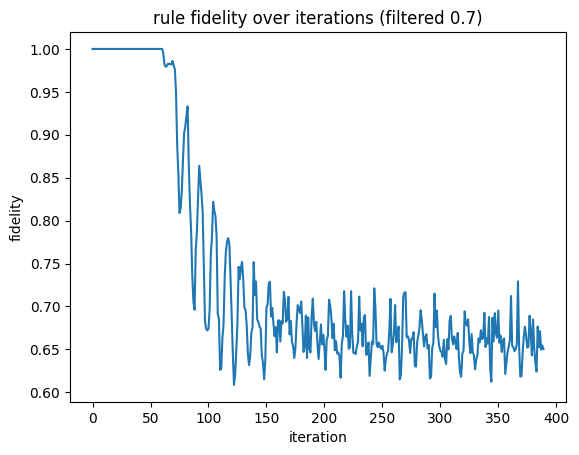

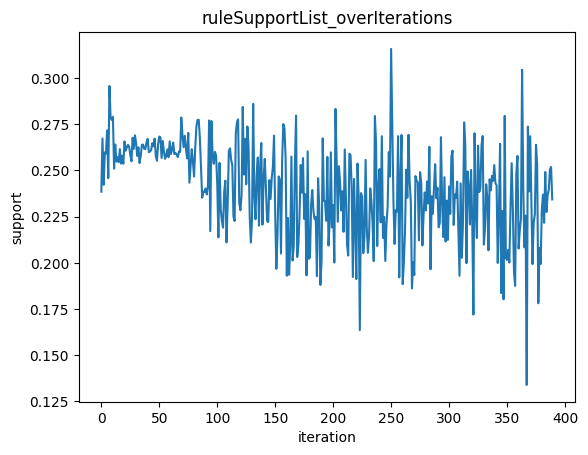

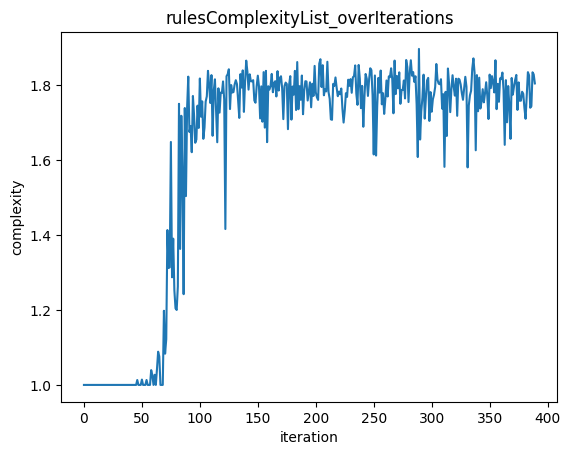

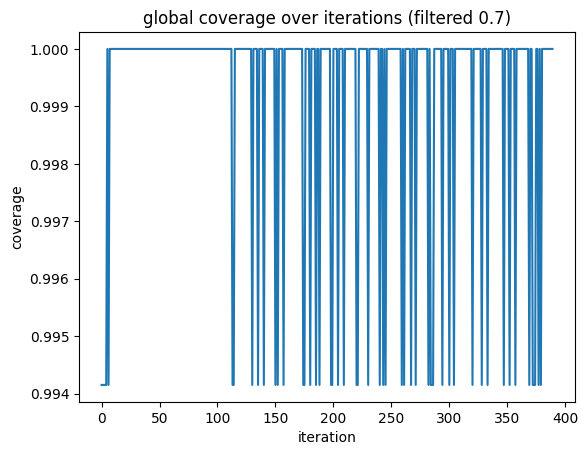

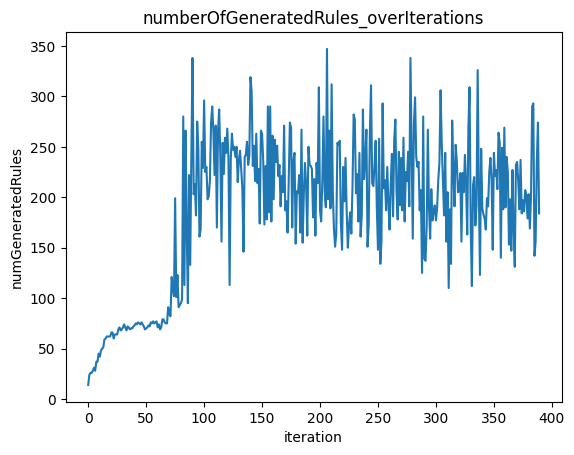

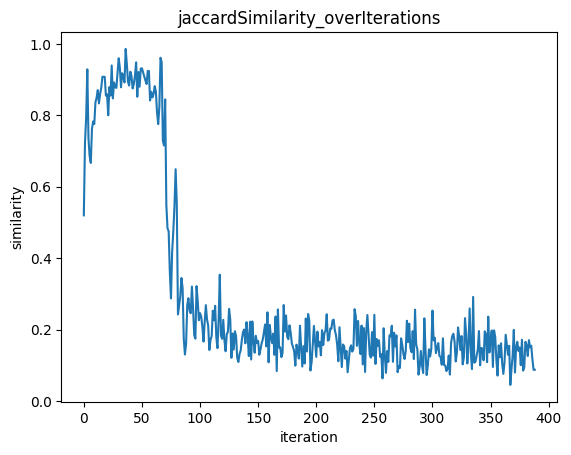

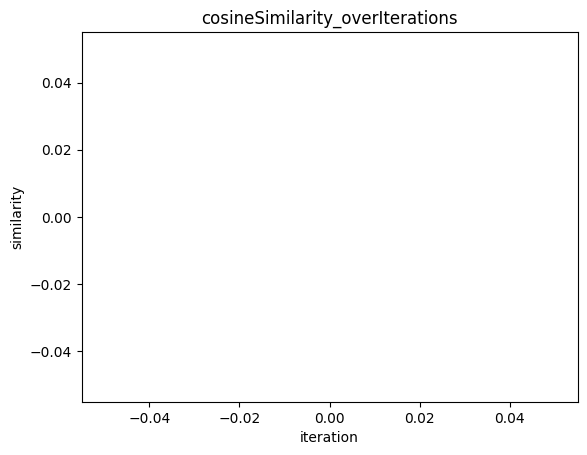

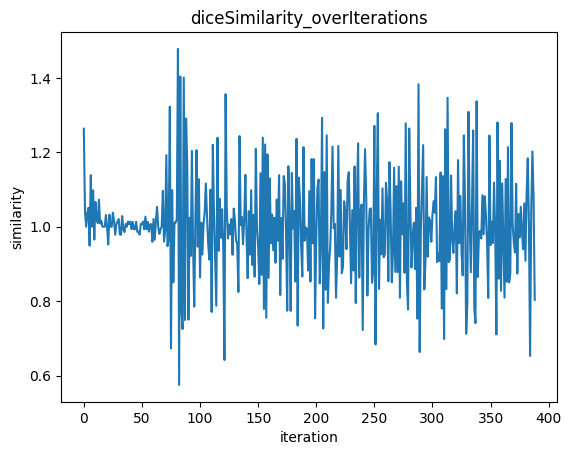

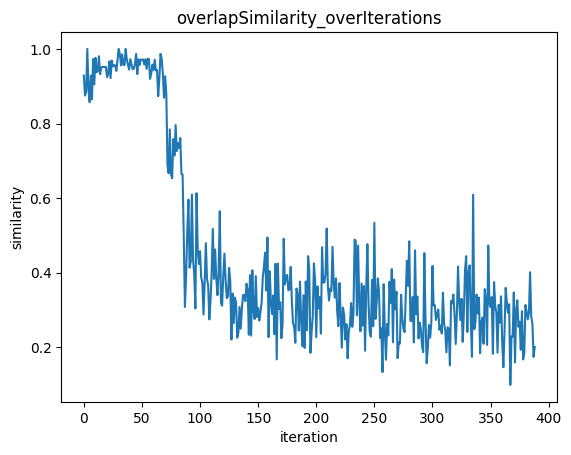

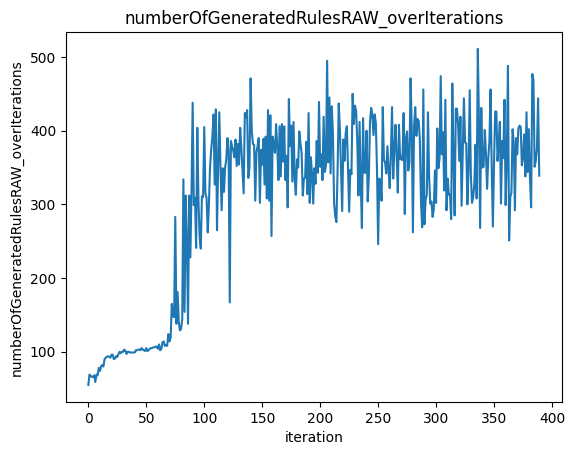

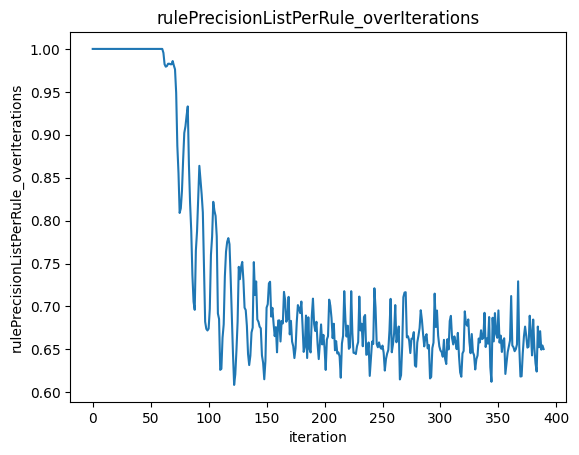

In [4]:
import os
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations_NOTFILTERD"]
print("...")

trackedRules_OHE_NOTFILTERED, item_to_index_NOTFILTERED,lables_OHE_NOTFILTERED = cega_utils.trackRulesList(temp_rules_list_overIterations, data["labelList_rules_overIterations_NOTFILTERED"])
trackedRules_OHE, item_to_index,lables_OHE = cega_utils.trackRulesList(data["rules_list_overIterations"], data["labelList_rules_overIterations"])
print(pathToNPZ)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)
utils.appendToNPZ(pathToNPZ, "lables_OHE", lables_OHE)
utils.appendToNPZ(pathToNPZ, "item_to_index", item_to_index)
##
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE_NOTFILTERED", trackedRules_OHE_NOTFILTERED)
utils.appendToNPZ(pathToNPZ, "lables_OHE_NOTFILTERED", lables_OHE_NOTFILTERED)
utils.appendToNPZ(pathToNPZ, "item_to_index_NOTFILTERD", item_to_index_NOTFILTERED)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")

rules_list_overIterations
labelList_rules_overIterations
rulePrecisionList_overIterations
predictionComparisonList_overIterations
rulesComplexityList_overIterations
globalCoverageList_overIterations
ruleSupportList_overIterations
numberOfGeneratedRules_overIterations
jaccardSimilarity_overIterations
cosineSimilarity_overIterations
overlapSimilarity_overIterations
diceSimilarity_overIterations
raw_rules_overIterations
numberOfGeneratedRulesRAW_overIterations
rulePrecisionListPerRule_overIterations
rulePrecisionListPerRule_overIterations_NOTFILTERED
ruleSupportList_overIterations_NOTFILTERED
discriminative_rules_overIterations
rules_list_overIterations_NOTFILTERD
labelList_rules_overIterations_NOTFILTERED
predictionComparisonList_overIterations_NOTFILTERED
globalCoverage_overIterations_NOTFILTERED
corectnessList_ALL_overIterations
corectnessList_AplicablRules_overIterations
corectnessList_ALL_NOTFILTERED_overIterations
corectnessList_AplicablRules_NOTFILTERED_overIterations
ModelPredicti

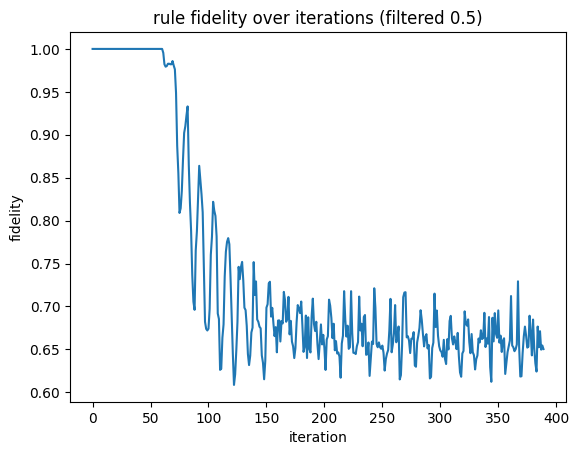

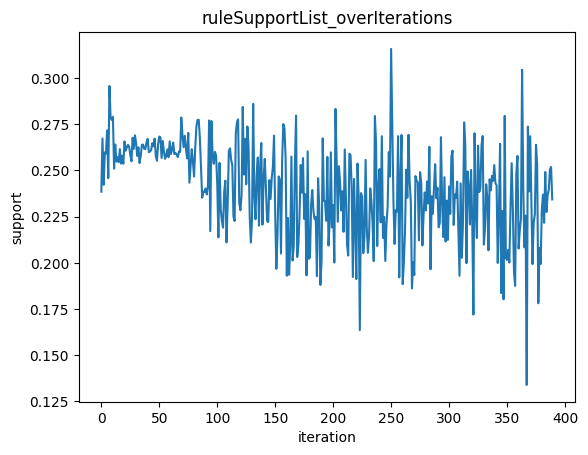

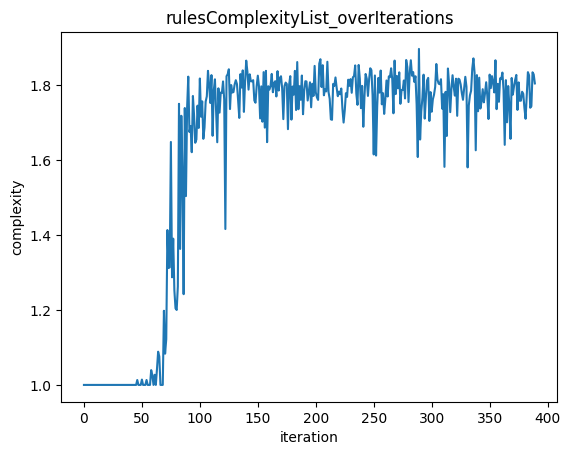

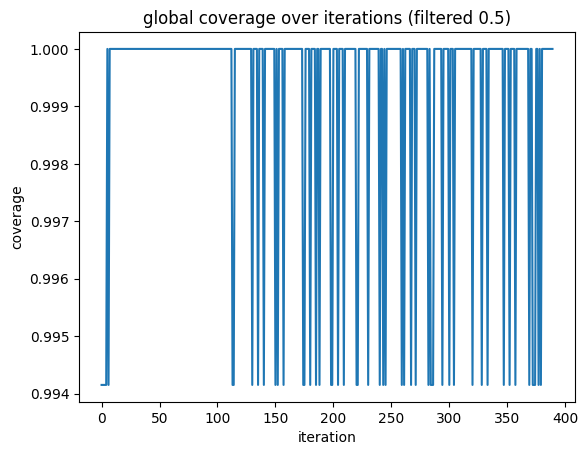

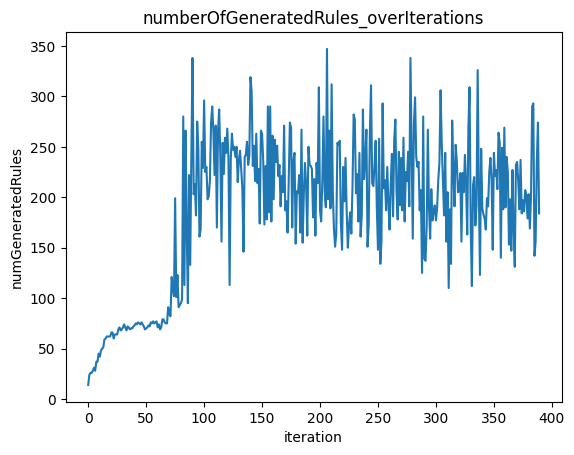

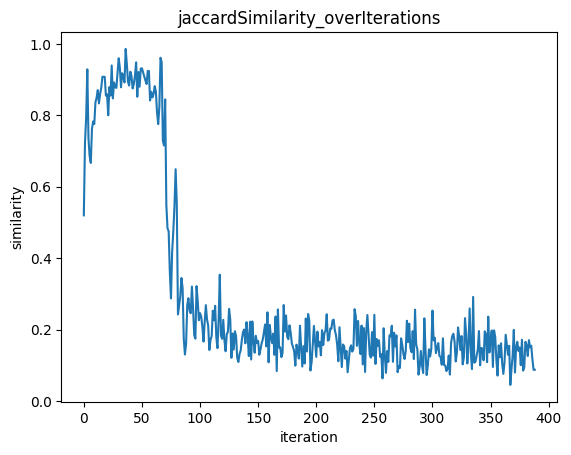

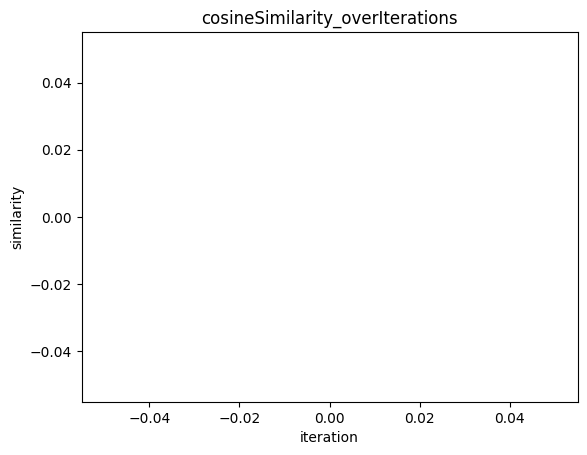

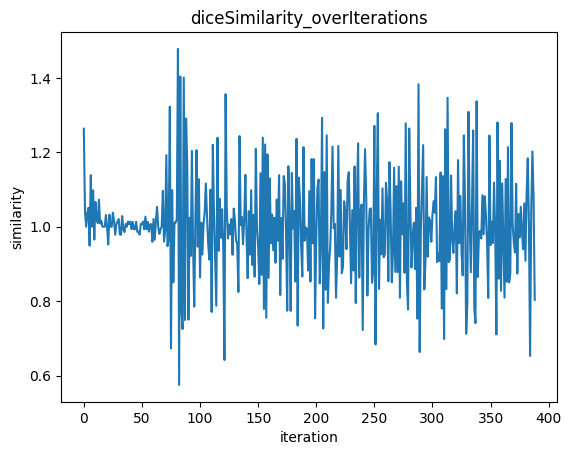

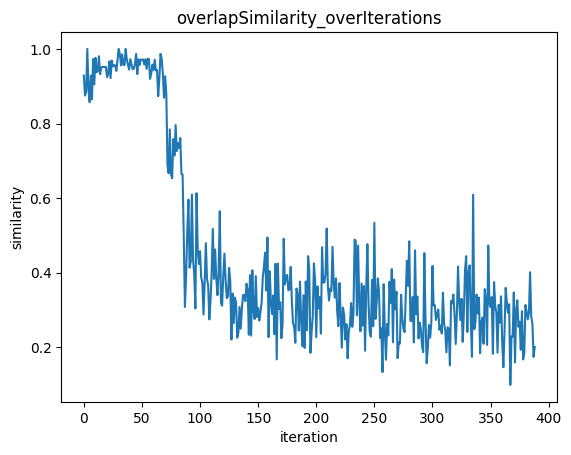

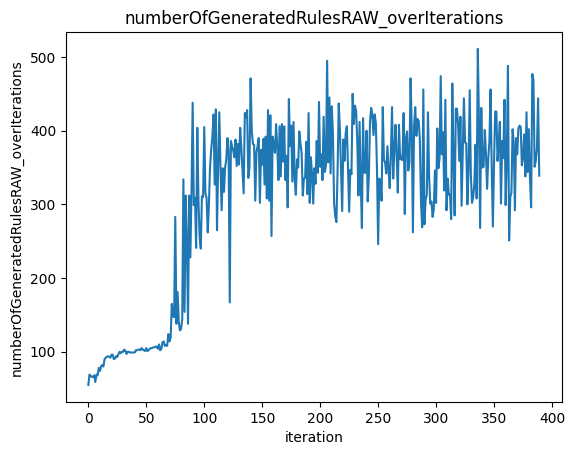

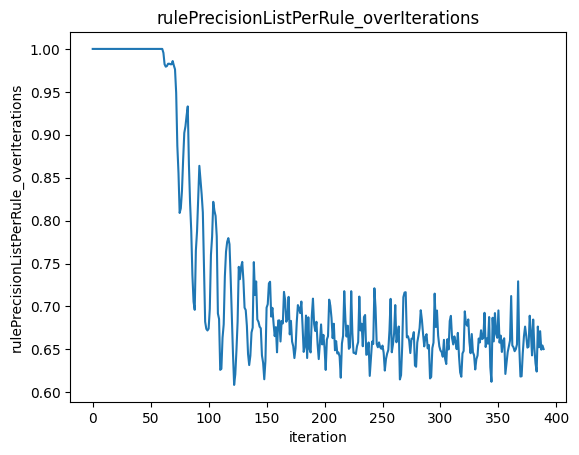

In [7]:
for i in data:
    print(i)
plotResults.plotRulesResults(data)

